In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 33.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
temperature = ctrl.Antecedent(np.arange(10,50), 'temperaature')
vitesse =ctrl.Consequent(np.arange(0,100),'vitesse')


In [4]:
#split to categories
temperature['froid']=fuzz.trimf(temperature.universe,[10,10,20])
temperature['agreable']=fuzz.trimf(temperature.universe,[15,25,30])
temperature['chaud']=fuzz.trimf(temperature.universe,[27,27,50])

In [5]:
vitesse['faible']=fuzz.trimf(vitesse.universe,[0,0,40])
vitesse['moyen']=fuzz.trimf(vitesse.universe,[30,50,70])
vitesse['eleve']=fuzz.trimf(vitesse.universe,[60,80,100])

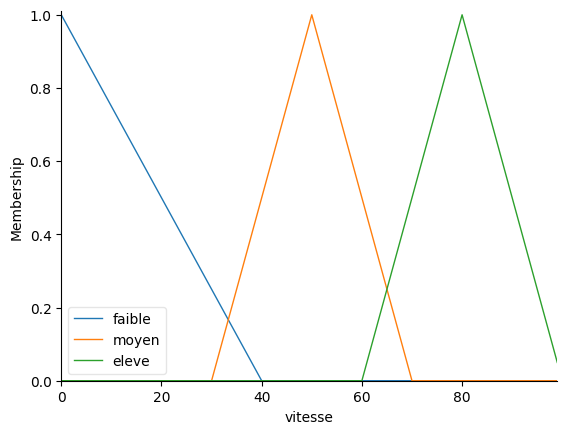

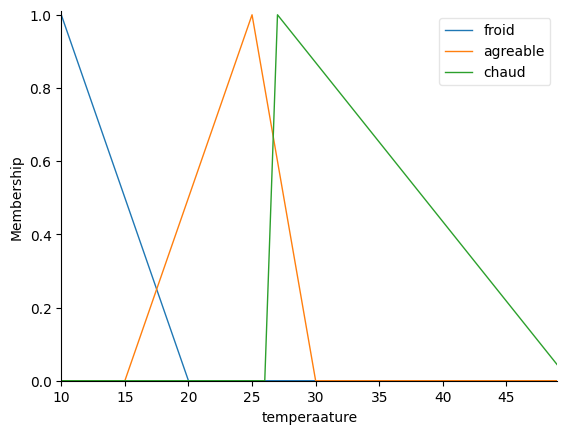

In [6]:
vitesse.view()
temperature.view()

In [7]:
rule=ctrl.Rule(temperature['froid'] ,vitesse['faible'])
rule1=ctrl.Rule(temperature['agreable'] ,vitesse['moyen'])
rule2=ctrl.Rule(temperature['chaud'] ,vitesse['eleve'])

In [9]:
vitesse_ctrl=ctrl.ControlSystem([rule,rule1,rule2])
vitesse_simulateur=ctrl.ControlSystemSimulation(vitesse_ctrl)
vitesse_simulateur.input['temperaature']=17

In [12]:
vitesse_simulateur.compute()
print(vitesse_simulateur.output['vitesse'])

30.574660633484207


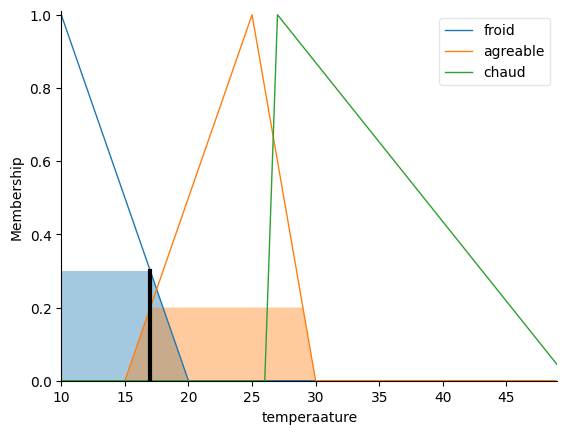

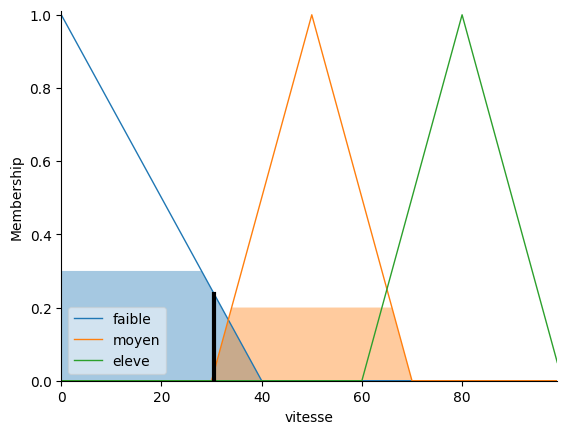

In [13]:
temperature.view(sim=vitesse_simulateur)
vitesse.view(sim=vitesse_simulateur)